In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as welch
from scipy.signal import find_peaks

In [2]:
M_points_signal = 1024
N_number_signals = 1000
Time = 3
fs = M_points_signal/Time

vector_time = np.linspace(0, Time, M_points_signal)


In [3]:
def generate_signal():
    freq1 = 1
    freq2 = 3
    freq3 = 5
    
    omega_0 = 2*np.pi
    
    amplitude1 = 1
    amplitude2 = 1/3
    amplitude3 = 1/5
    
    #signal =(amplitude1*np.cos(omega_0*freq1*vector_time) - amplitude2*np.cos(omega_0*freq2*vector_time) + amplitude3*np.cos(omega_0*freq3*vector_time))
    signal =(amplitude1*np.cos(omega_0*freq1*vector_time) - amplitude2*np.cos(omega_0*freq2*vector_time) + amplitude3*np.cos((omega_0+np.pi/2)*freq3*vector_time))
    return signal
  

In [4]:
def noise_gaussian(mean, level_noise,size):
    noise= np.random.normal(mean, level_noise, size=M_points_signal)
    return noise

In [5]:
from scipy.signal import welch

def psd_calculate(signal, fs, nperseg):
    freq, Pxx_den = welch(signal, fs=fs, nperseg=nperseg)
    return freq, Pxx_den

In [6]:
signal = generate_signal() 
signal_1 = generate_signal() + noise_gaussian(0, 0.1, M_points_signal)
signal_2 = generate_signal() + noise_gaussian(0, 0.3, M_points_signal)
signal_3 = generate_signal() + noise_gaussian(0, 1, M_points_signal)
signal_4 = generate_signal() + noise_gaussian(0, 3, M_points_signal)

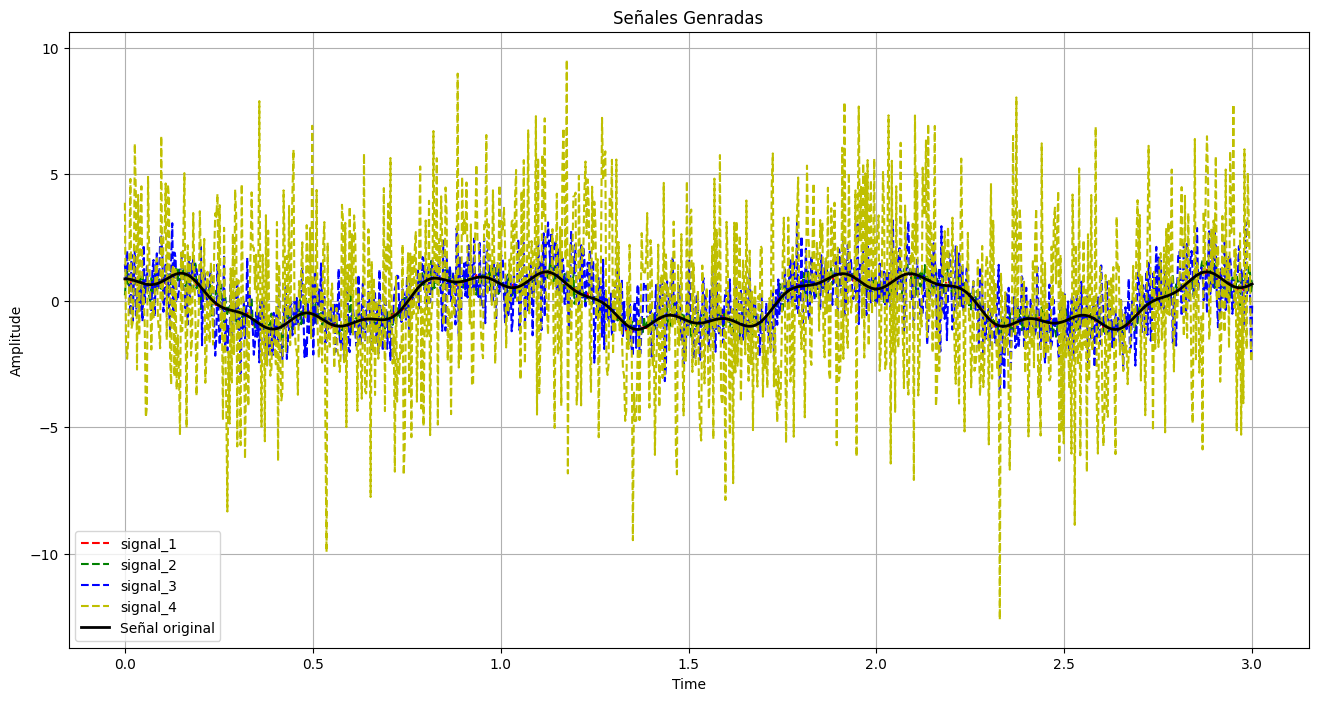

In [7]:
plt.figure(figsize=(16,8))
plt.plot(vector_time, signal_1, label='signal_1', color='r', linestyle='--')
plt.plot(vector_time, signal_2, label='signal_2', color='g', linestyle='--')
plt.plot(vector_time, signal_3, label='signal_3', color='b', linestyle='--')
plt.plot(vector_time, signal_4, label='signal_4', color='y', linestyle='--')   
plt.plot(vector_time, signal, label='Señal original', color='black', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Señales Genradas')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#psd de las señales creadas  por welch
freq, Pxx_signal = psd_calculate(signal, fs, M_points_signal)
freq1, Pxx_signal_1 = psd_calculate(signal_1, fs, M_points_signal)
freq2, Pxx_signal_2 = psd_calculate(signal_2, fs, M_points_signal)
freq3, Pxx_signal_3 = psd_calculate(signal_3, fs, M_points_signal)
freq4, Pxx_signal_4 = psd_calculate(signal_4, fs, M_points_signal)




C:\Users\Usuario\AppData\Local\Temp\ipykernel_292\275661754.py:13: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10**-9,0)


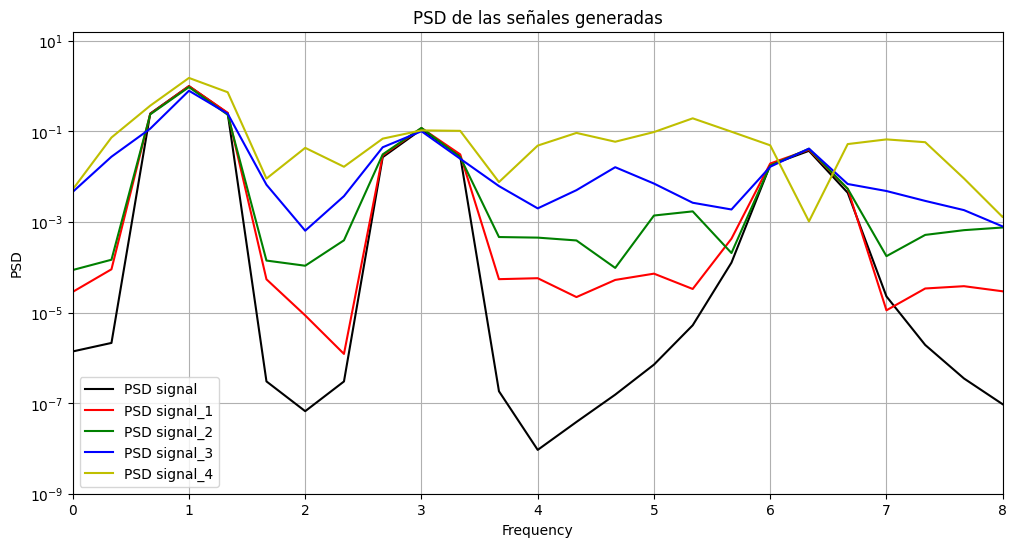

In [9]:
plt.figure(figsize=(12,6))
plt.semilogy(freq, Pxx_signal, label='PSD signal', color='black')
plt.semilogy(freq1, Pxx_signal_1, label='PSD signal_1', color='r')
plt.semilogy(freq2, Pxx_signal_2, label='PSD signal_2', color='g')
plt.semilogy(freq3, Pxx_signal_3, label='PSD signal_3', color='b')
plt.semilogy(freq4, Pxx_signal_4, label='PSD signal_4', color='y')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD de las señales generadas')
plt.legend()
plt.grid(True)
plt.xlim(0,8)
plt.ylim(10**-9,0)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Preparación de los datos
signals = np.array([signal_1, signal_2, signal_3, signal_4])
psds = np.array([Pxx_signal_1, Pxx_signal_2, Pxx_signal_3, Pxx_signal_4])

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(signals, psds, test_size=0.2, random_state=42)


In [11]:
# Construcción del modelo
model = Sequential()

# Añadir capas al modelo
model.add(Dense(512, input_shape=(M_points_signal,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(Pxx_signal), activation='linear'))  # Salida con la misma cantidad de puntos que la PSD

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 0.0047 - val_loss: 0.0017
Epoch 2/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0053 - val_loss: 0.0017
Epoch 3/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0046 - val_loss: 0.0017
Epoch 4/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0051 - val_loss: 0.0017
Epoch 5/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 6/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0046 - val_loss: 0.0017
Epoch 7/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 8/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.0053 - val_loss: 0.0017
Epoch 9/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0053 - val_loss: 0.0017
Epoch 10/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 11/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0042 - val_loss: 0.0016
Epoch 12/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step

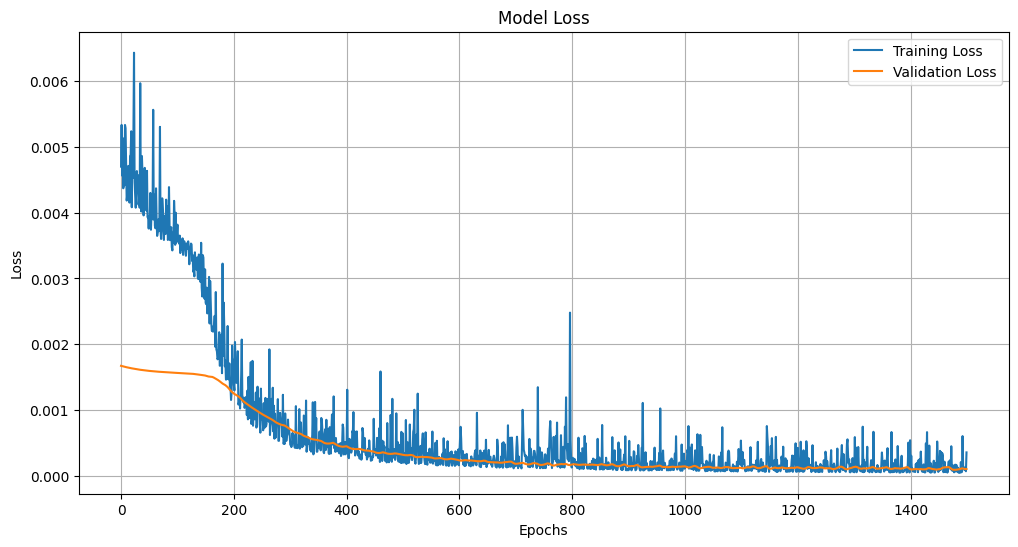

In [14]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=1500, batch_size=16, validation_data=(X_test, y_test))
# Obtener las métricas de rendimiento
loss = history.history['loss']
val_loss = history.history['val_loss']



plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


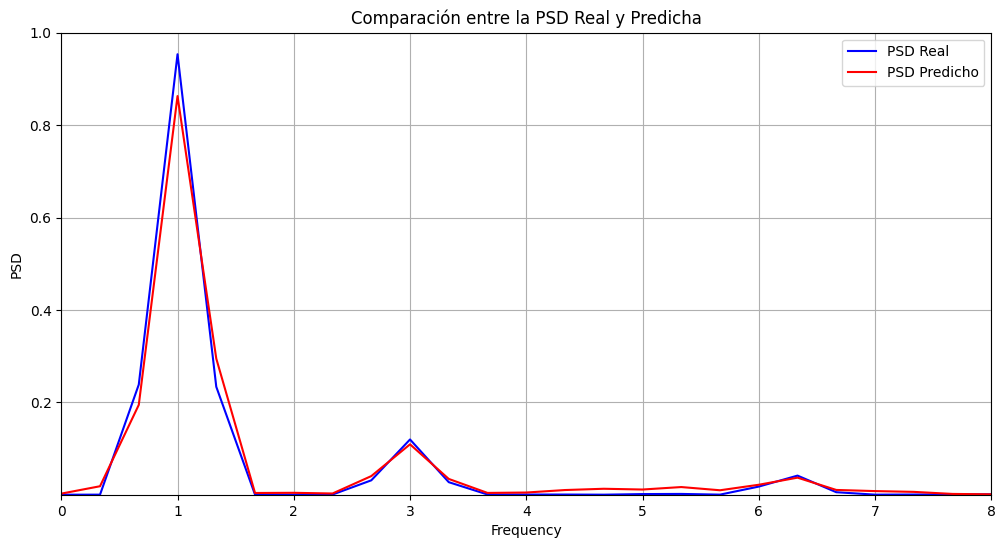

In [18]:

predicted_psd = model.predict(X_test)



plt.figure(figsize=(12, 6))
plt.plot(freq, y_test[0], label='PSD Real', color='blue')
plt.plot(freq, predicted_psd[0], label='PSD Predicho', color='red')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('Comparación entre la PSD Real y Predicha')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0)  
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


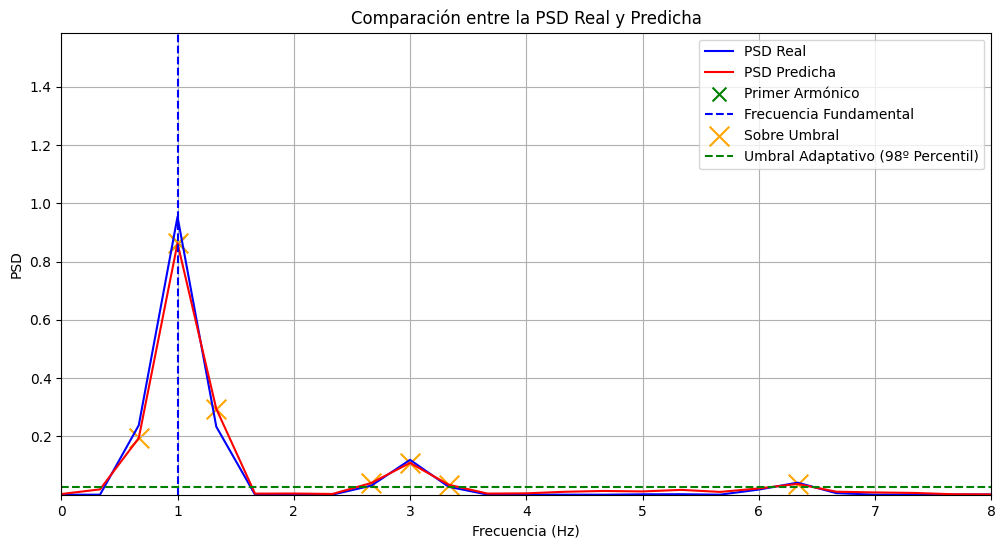

In [26]:

print = __builtins__.print 


predicted_psd = model.predict(X_test)


peaks, properties = find_peaks(predicted_psd[0])

# umbral adaptativo
percentil = 98
umbral_adaptativo = np.percentile(predicted_psd[0], percentil)
umbral_index = np.argmin(np.abs(predicted_psd[0] - umbral_adaptativo))
frecuencia_umbral = freq[umbral_index]

# identi
indices_sobre_umbral = np.where(predicted_psd[0] > umbral_adaptativo)[0]
frecuencias_sobre_umbral = freq[indices_sobre_umbral]
psd_sobre_umbral = predicted_psd[0][indices_sobre_umbral]


plt.figure(figsize=(12, 6))
plt.plot(freq, y_test[0], label='PSD Real', color='blue')
plt.plot(freq, predicted_psd[0], label='PSD Predicha', color='red')
if peaks.size > 0:
    indice_fundamental = peaks[0]
    frecuencia_fundamental = freq[indice_fundamental]
    plt.scatter(frecuencia_fundamental, predicted_psd[0][indice_fundamental], color='green', marker='x', s=100, label='Primer Armónico')
    plt.axvline(x=frecuencia_fundamental, color='blue', linestyle='--', label='Frecuencia Fundamental')
plt.scatter(frecuencias_sobre_umbral, psd_sobre_umbral, color='orange', marker='x', s=200, label='Sobre Umbral')

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.title('Comparación entre la PSD Real y Predicha')
plt.axhline(umbral_adaptativo, color='green', linestyle='--', label=f'Umbral Adaptativo ({percentil}º Percentil)')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0.2)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Frecuencia del primer armónico: 1.00 Hz
Frecuencia del tercer armónico: 3.00 Hz
5.333333333333333
Frecuencia del quinto armónico: 5.33 Hz


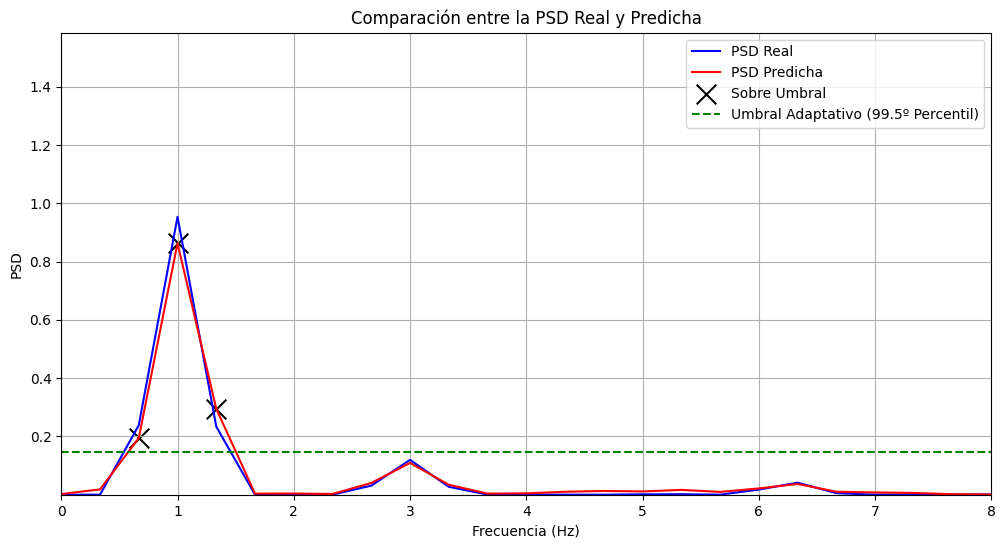

In [30]:

print = __builtins__.print  


predicted_psd = model.predict(X_test)
peaks, properties = find_peaks(predicted_psd[0])

# umbral adaptativo
percentil = 99.5
umbral_adaptativo = np.percentile(predicted_psd[0], percentil)
umbral_index = np.argmin(np.abs(predicted_psd[0] - umbral_adaptativo))
frecuencia_umbral = freq[umbral_index]


indices_sobre_umbral = np.where(predicted_psd[0] > umbral_adaptativo)[0]
frecuencias_sobre_umbral = freq[indices_sobre_umbral]
psd_sobre_umbral = predicted_psd[0][indices_sobre_umbral]


plt.figure(figsize=(12, 6))
plt.plot(freq, y_test[0], label='PSD Real', color='blue')
plt.plot(freq, predicted_psd[0], label='PSD Predicha', color='red')


if peaks.size > 0:
  
    frecuencias_armonicos = freq[peaks]
    if len(frecuencias_armonicos) >= 5:
        frecuencia_armonico_1 = frecuencias_armonicos[0]  
        frecuencia_armonico_3 = frecuencias_armonicos[2]  
        frecuencia_armonico_5 = frecuencias_armonicos[4]  
        print(f'Frecuencia del primer armónico: {frecuencia_armonico_1:.2f} Hz')
        print(f'Frecuencia del tercer armónico: {frecuencia_armonico_3:.2f} Hz')
        print(frecuencia_armonico_5)
        print(f'Frecuencia del quinto armónico: {frecuencia_armonico_5:.2f} Hz')
    else:
        print('No se detectaron suficientes armónicos para acceder a los armónicos 1, 3 y 5.')
plt.scatter(frecuencias_sobre_umbral, psd_sobre_umbral, color='black', marker='x', s=200, label='Sobre Umbral')

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.title('Comparación entre la PSD Real y Predicha')
plt.axhline(umbral_adaptativo, color='green', linestyle='--', label=f'Umbral Adaptativo ({percentil}º Percentil)')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0.2)
plt.show()


In [33]:
wk1=(frecuencia_armonico_1/frecuencia_armonico_1)
wk3=np.sqrt((frecuencia_armonico_3/frecuencia_armonico_1))
wk5=np.sqrt((frecuencia_armonico_5/frecuencia_armonico_1))

print(wk1)
print(wk3)
print(wk5)


1.0
1.7320508075688772
2.309401076758503


In [34]:
def generate_signal():
    freq1 = wk1
    freq2 = wk3
    freq3 = wk5

    omega_0 = 2*np.pi

    amplitude1 = 1
    amplitude2 = 1/3
    amplitude3 = 1/5

    signal =(amplitude1*np.cos(omega_0*freq1*vector_time) - amplitude2*np.cos(omega_0*freq2*vector_time) + amplitude3*np.cos(omega_0*freq3*vector_time))
    return signal




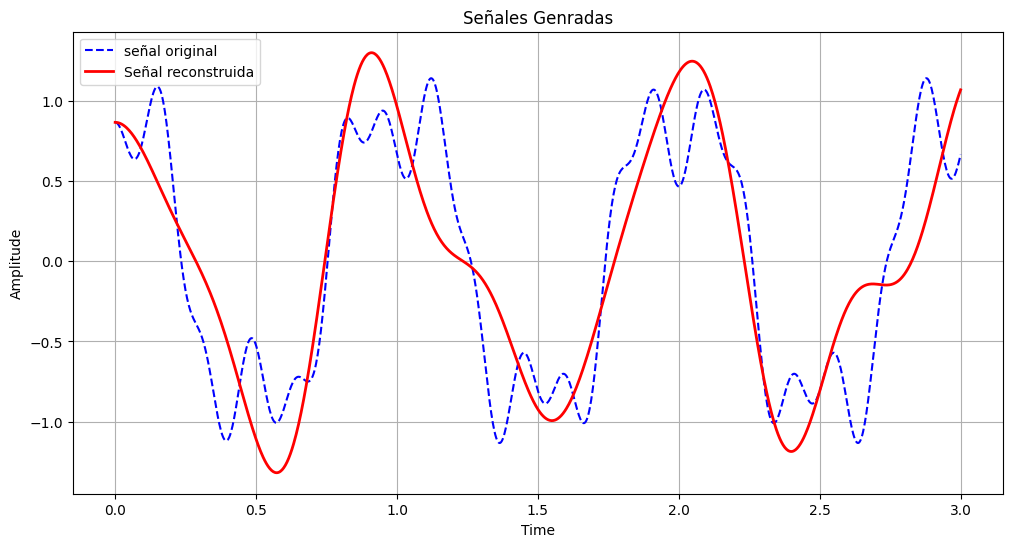

In [36]:
signaljk = generate_signal()
plt.figure(figsize=(12,6))
plt.plot(vector_time, signal, label='señal original', color='blue', linestyle='--')

plt.plot(vector_time, signaljk, label='Señal reconstruida', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Señales Genradas')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/1500


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.6810 - val_loss: 0.0716
Epoch 2/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.7230 - val_loss: 0.0463
Epoch 3/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.9367 - val_loss: 0.0386
Epoch 4/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.4872 - val_loss: 0.0307
Epoch 5/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.3688 - val_loss: 0.0271
Epoch 6/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.1894 - val_loss: 0.0227
Epoch 7/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.2421 - val_loss: 0.0171
Epoch 8/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.1355 - val_loss: 0.0118
Epoch 9/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.2591 - val_loss: 0.0089
Epoch 10/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.1419 - val_loss: 0.0072
Epoch 11/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.1314 - val_loss: 0.0065
Epoch 12/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.1004 

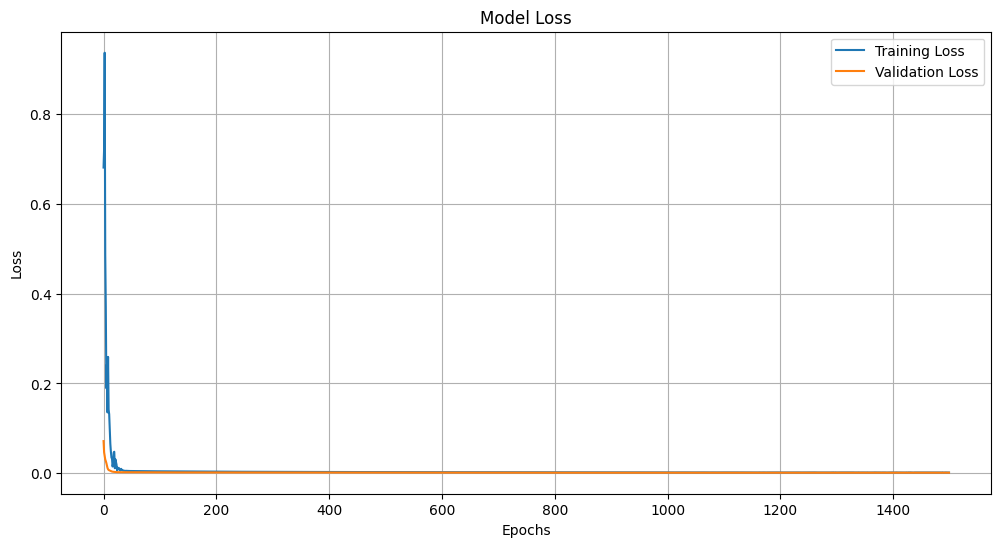

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Valor en 1 Hz: 9.5725e-01
Valor en 3 Hz: 1.0141e-01
Valor en 5 Hz: 4.7195e-02


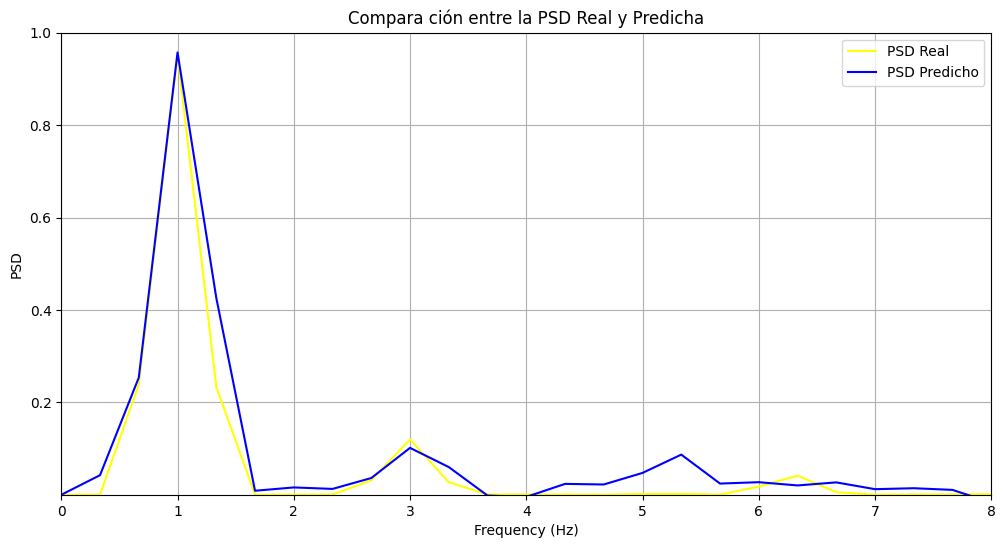

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


signals = np.array([signal_1, signal_2, signal_3, signal_4])
psds = np.array([Pxx_signal_1, Pxx_signal_2, Pxx_signal_3, Pxx_signal_4])


X_train, X_test, y_train, y_test = train_test_split(signals, psds, test_size=0.2, random_state=42)

# Modelo NN
model = Sequential()
model.add(Dense(128, input_dim=signals.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(psds.shape[1]))

# Entrenamiento modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=1500, batch_size=16, validation_data=(X_test, y_test), verbose=1)
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()

# Realizar predicciones
predicted_psd = model.predict(X_test)


frequencias_interes = [1, 3, 5]

# Encontrar los valores de PSD en las frecuencias deseadas para la primera muestra en X_test
for i, freq_val in enumerate(frequencias_interes):
    # Encontrar el índice de la frecuencia más cercana
    idx = np.argmin(np.abs(freq - freq_val))
    print(f'Valor en {freq_val} Hz: {predicted_psd[0][idx]:.4e}')

# Graficar la PSD real vs. la predicha
plt.figure(figsize=(12, 6))
plt.plot(freq, y_test[0], label='PSD Real', color='yellow')
plt.plot(freq, predicted_psd[0], label='PSD Predicho', color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Compara ción entre la PSD Real y Predicha')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0)  # Ajuste del rango y-lim para visualizar mejor los valores
plt.show()


In [38]:
#Valor en 1 Hz: 9.5725e-01
#Valor en 3 Hz: 1.0141e-01
#Valor en 5 Hz: 4.7195e-02
def generate_signal():
    freq1 = 1
    freq2 = 3
    freq3 = 5

    omega_0 = 2*np.pi

    signal =((np.sqrt(9.5725e-01/9.5725e-01))*np.cos(omega_0*freq1*vector_time) - (np.sqrt(1.0141e-01/9.5725e-01))*np.cos(omega_0*freq2*vector_time) + (np.sqrt(4.7195e-02/9.5725e-01))*np.cos(omega_0*freq3*vector_time))
    return signal


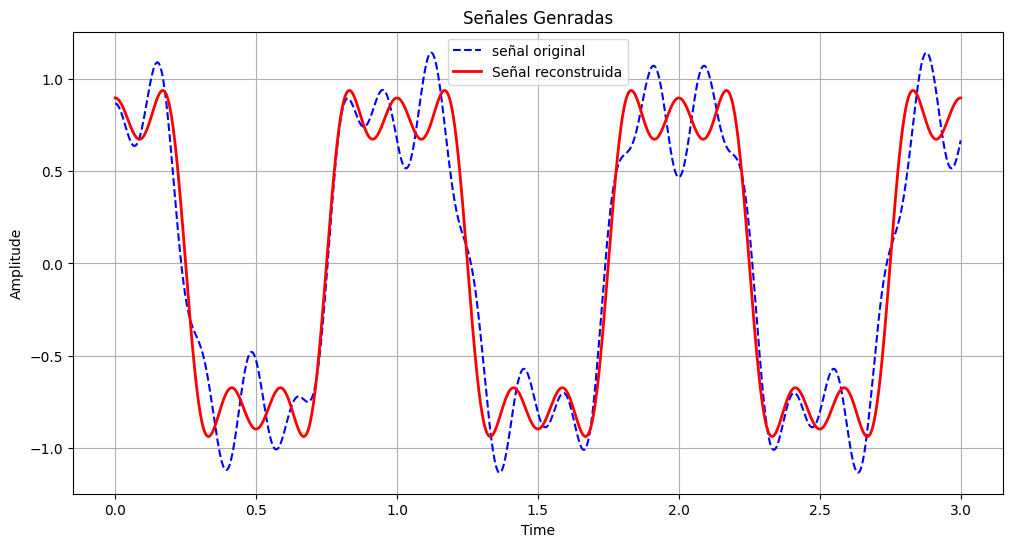

In [44]:
signaljkl = generate_signal()
plt.figure(figsize=(12,6))
plt.plot(vector_time, signal, label='señal original', color='blue', linestyle='--')
plt.plot(vector_time, signaljkl, label='Señal reconstruida', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Señales Genradas')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/500


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0855 - val_loss: 0.0041
Epoch 2/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - val_loss: 3.0107e-04
Epoch 3/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - val_loss: 7.3598e-05
Epoch 4/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - val_loss: 1.2185e-04
Epoch 5/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - val_loss: 6.8076e-05
Epoch 6/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - val_loss: 4.6491e-04
Epoch 7/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - val_loss: 1.3410e-04
Epoch 8/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - val_loss: 1.0091e-04
Epoch 9/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - val_loss: 1.6410e-04
Epoch 10/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - val_loss: 8.3008e-04
Epoch 11/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - val_loss: 7.6564e-05
Epoch 12/500
24/24 ━━━━━━━━━━━━━━━

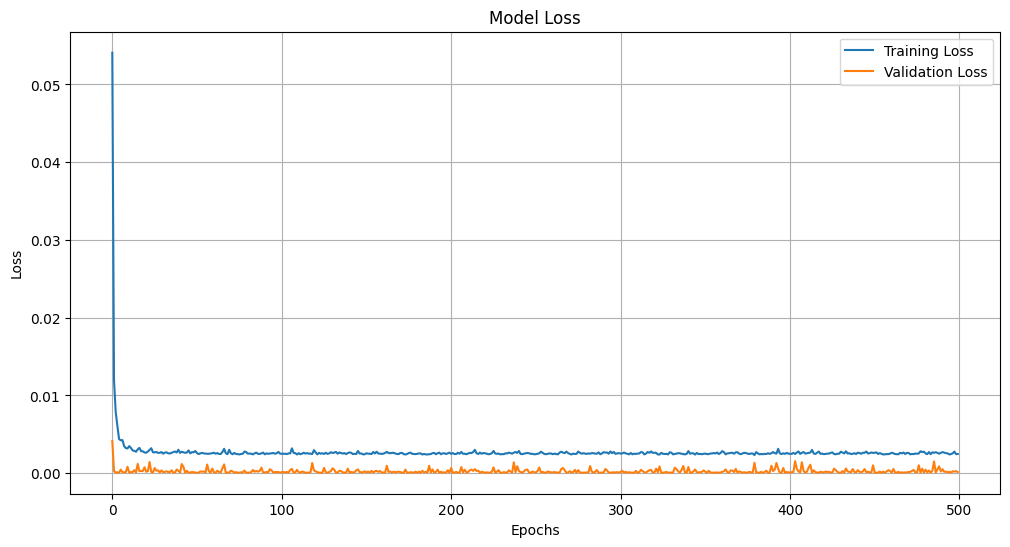

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scipy.interpolate import interp1d

# Calcular la mediana de cada señal
signalK = np.array([signal_1, signal_2, signal_3, signal_4])
mediansignalk = np.median(signalK, axis=0)

# Calcular la mediana de cada PSD
pxxk = np.array([Pxx_signal_1, Pxx_signal_2, Pxx_signal_3, Pxx_signal_4])
medianpxxsignal = np.median(pxxk, axis=0)

# Asegurarse de que ambos tengan el mismo tamaño mediante interpolación
if len(mediansignalk) > len(medianpxxsignal):
    interpolator = interp1d(np.linspace(0, 1, len(medianpxxsignal)), medianpxxsignal, kind='linear')
    medianpxxsignal = interpolator(np.linspace(0, 1, len(mediansignalk)))
elif len(medianpxxsignal) > len(mediansignalk):
    interpolator = interp1d(np.linspace(0, 1, len(mediansignalk)), mediansignalk, kind='linear')
    mediansignalk = interpolator(np.linspace(0, 1, len(medianpxxsignal)))

# Convertir a arrays bidimensionales para que sean compatibles con el modelo
mediansignalk = mediansignalk.reshape(-1, 1)
medianpxxsignal = medianpxxsignal.reshape(-1, 1)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(mediansignalk, medianpxxsignal, test_size=0.25, random_state=42)

# Construcción del modelo
model = Sequential()

# Añadir capas al modelo
model.add(Dense(512, input_shape=(1,), activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(1, activation='linear'))  # Salida con una sola característica

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

# Predecir la PSD de la mediana usando el conjunto de prueba
predicted_psd = model.predict(X_test)

# Obtener las métricas de rendimiento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar las métricas de rendimiento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()


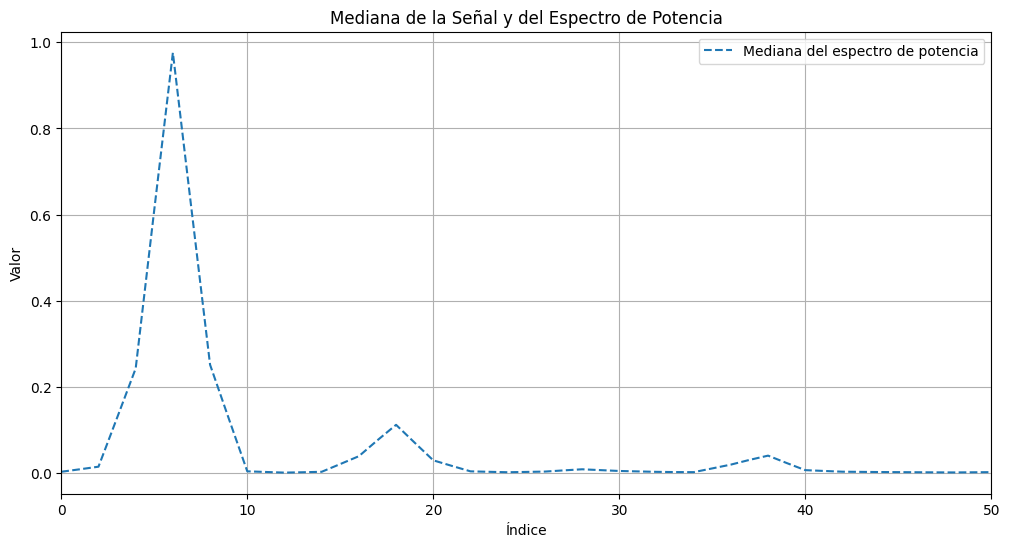

In [42]:
# Graficar la mediana de la señal y la mediana del espectro de potencia
plt.figure(figsize=(12, 6))
plt.plot(medianpxxsignal, label='Mediana del espectro de potencia', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Mediana de la Señal y del Espectro de Potencia')
plt.xlim(0, 50)  # Limitar el eje x de 0 a 50
plt.legend()
plt.grid(True)
plt.show()

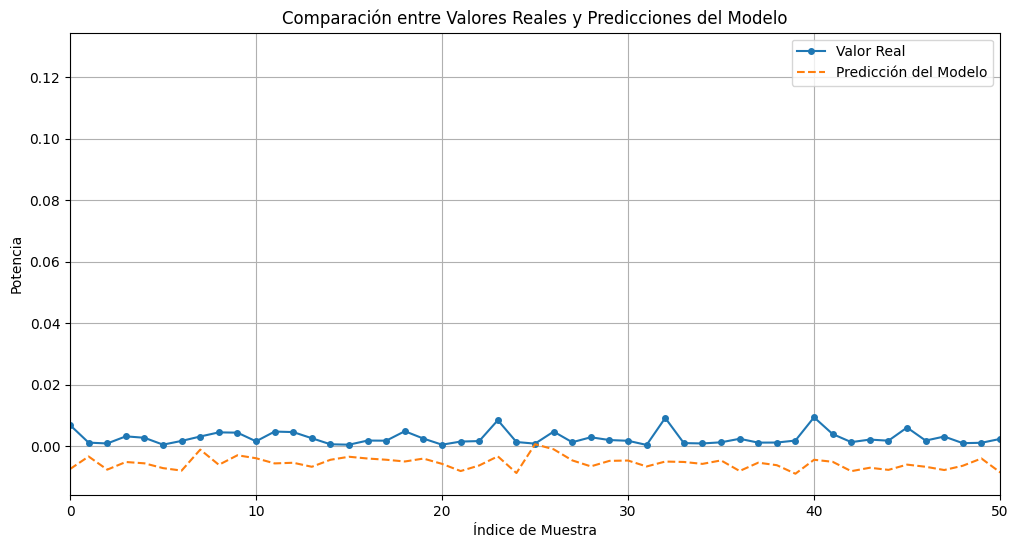

In [43]:
# Graficar la comparación de las predicciones y los valores reales
plt.figure(figsize=(12, 6))

# Plot para los datos de prueba
plt.plot(y_test, label='Valor Real', linestyle='-', marker='o', markersize=4)
plt.plot(predicted_psd, label='Predicción del Modelo', linestyle='--', markersize=4)

plt.xlabel('Índice de Muestra')
plt.ylabel('Potencia')
plt.title('Comparación entre Valores Reales y Predicciones del Modelo')
plt.xlim(0, 50)  # Limitar el eje x de 0 a 50
plt.legend()
plt.grid(True)
plt.show()